# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
import requests
import time


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

print("***************************************************************************************")
# df.head(n).to_csv('yourfileout.csv', encoding='utf-8')
# logging.info('dataframe head - {}'.format(df.head()))
print("Do I need to include logging in addition to wrting out the .csv???")
print("***************************************************************************************")
    
# Print the city count to confirm sufficient count
print(len(cities))
print(cities)
print("*******************************************************************************************")
print("Temporarily reducging cities from cities to cities[0:4] so only get 4 cities intially")
print("before calling api.openweathermap.org since they have limits") 
print("I believe 60 calls/minute and 1M calls/month per month)")
cities = cities[0:4]
print("*******************************************************************************************")
print(cities)

***************************************************************************************
Do I need to include logging in addition to wrting out the .csv???
***************************************************************************************
612
['busselton', 'new norfolk', 'pemberton', 'kavaratti', 'qax', 'solano', 'porterville', 'monastyrshchina', 'carnarvon', 'leningradskiy', 'punta arenas', 'mataura', 'vanavara', 'dikson', 'hilo', 'harper', 'tasiilaq', 'dzhebariki-khaya', 'east london', 'ushuaia', 'saint-philippe', 'rikitea', 'nikolskoye', 'barrow', 'zhanaozen', 'hasaki', 'avarua', 'acapulco', 'guerrero negro', 'bethel', 'san cristobal', 'ilulissat', 'codrington', 'conceicao da barra', 'sioux lookout', 'hermanus', 'caranavi', 'gizo', 'yellowknife', 'vostok', 'puerto leguizamo', 'thinadhoo', 'bowen', 'ponta do sol', 'manado', 'grand-santi', 'fortuna', 'portland', 'chengde', 'saint george', 'talnakh', 'kizhinga', 'torbay', 'damietta', 'vaini', 'mahebourg', 'mitsamiouli', 'atuona', '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


#city = "London"

#cities = ["Paris", "London", "Oslo", "Beijing"]

# set up lists to hold reponse info
lat = []
lon = []
temp = []
humidity=[]
clouds=[]
wind=[]
city_counter=0

print("cities")
print(cities)
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    lon.append(response['coord']['lon'])
    temp.append(response['main']['temp'])
    humidity.append(response['main']['humidity'])
    clouds.append(response['clouds']['all'])
    wind.append(response['wind']['speed'])
    
    print(f"The latitude information for city {city} #{city_counter} received is: {lat}")
    print(f"The latitude information for city {city} #{city_counter} received is: {lon}")
    print(f"The temperature information for city {city} #{city_counter} received is: {temp}")
    print(f"The humidty information for city {city} #{city_counter} received is: {humidity}")
    print(f"The cloudiness information for city {city} #{city_counter} received is: {clouds}")
    print(f"The windiness information for city {city} #{city_counter} received is: {wind}")

    city_counter+=1

    
# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city  

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

cities
['busselton', 'new norfolk', 'pemberton', 'kavaratti']
The latitude information for city busselton #0 received is: [-33.65]
The latitude information for city busselton #0 received is: [115.3333]
The temperature information for city busselton #0 received is: [23.36]
The humidty information for city busselton #0 received is: [44]
The cloudiness information for city busselton #0 received is: [1]
The windiness information for city busselton #0 received is: [1.2]
The latitude information for city new norfolk #1 received is: [-33.65, -42.7826]
The latitude information for city new norfolk #1 received is: [115.3333, 147.0587]
The temperature information for city new norfolk #1 received is: [23.36, 29.19]
The humidty information for city new norfolk #1 received is: [44, 20]
The cloudiness information for city new norfolk #1 received is: [1, 66]
The windiness information for city new norfolk #1 received is: [1.2, 1.02]
The latitude information for city pemberton #2 received is: [-33.65, 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

 # create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed":wind 
}
weather_data = pd.DataFrame(weather_dict)

print("*******************************************************************************************")
print("Temporarily printing out weather_data.head() just below to see table data in this cell,")
print("but can remove the line below later since basically in the next cell")
print("*******************************************************************************************")
print(weather_data.head())


# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
weather_data.to_csv(output_data_file, encoding="utf-8", index=False)

*******************************************************************************************
Temporarily printing out weather_data.head() just below to see table data in this cell,
but can remove the line below later since basically in the next cell
*******************************************************************************************
          city      lat       lon   temp  Humidity  Cloudiness  Wind Speed
0    busselton -33.6500  115.3333  23.36        44           1        1.20
1  new norfolk -42.7826  147.0587  29.19        20          66        1.02
2    pemberton  50.3164 -122.8027   2.92        98         100        1.67
3    kavaratti  10.5669   72.6420  25.87        71         100        5.03


In [5]:
# Display the DataFrame
weather_data

,city,lat,lon,temp,Humidity,Cloudiness,Wind Speed
0,busselton,-33.6500,115.3333,23.36,44,1,1.20
1,new norfolk,-42.7826,147.0587,29.19,20,66,1.02
2,pemberton,50.3164,-122.8027,2.92,98,100,1.67
3,kavaratti,10.5669,72.6420,25.87,71,100,5.03


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 


In [6]:
cities_high_humidity = []
city_counter=0
for city in cities:
    if int(humidity[city_counter]) > 100:
        print(f"The humidty information for city {city} #{city_counter} received is: {humidity[city_counter]}")
        # Create a new list to track high humifity index values
        cities_high_humidity.append(city_counter)
        print(f"{city} with city_counter of {city_counter} has humidty >100 so need to remove later")
    else:
        print("Skip since no humidity >100")
    city_counter+=1
print("Latest cities_high_humidity")
print(cities_high_humidity)

Skip since no humidity >100
Skip since no humidity >100
Skip since no humidity >100
Skip since no humidity >100
Latest cities_high_humidity
[]


In [7]:
#  Get the indices of cities that have humidity over 100%.
print("Latest cities_high_humidity")
print(cities_high_humidity)

Latest cities_high_humidity
[]


In [8]:
# Make a new DataFrame equal to the city data (aka weather_data) to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=weather_data
if len(cities_high_humidity) > 0:
    print(f"have high humidity data for city index #(s) {cities_high_humidity}")
    # dropping a row(s) from actual dataframe
    #df.drop(['c', 'd'], inplace = True )
    clean_city_data=weather_data.drop(cities_high_humidity, inplace=False) 
else:
    print("No high humidity data") 
print("weather_data") 
print(weather_data)
print()
print("clean_city_data") 
print(clean_city_data)
#print("dtypes()")
#print(clean_city_data.dtypes)

No high humidity data
weather_data
          city      lat       lon   temp  Humidity  Cloudiness  Wind Speed
0    busselton -33.6500  115.3333  23.36        44           1        1.20
1  new norfolk -42.7826  147.0587  29.19        20          66        1.02
2    pemberton  50.3164 -122.8027   2.92        98         100        1.67
3    kavaratti  10.5669   72.6420  25.87        71         100        5.03

clean_city_data
          city      lat       lon   temp  Humidity  Cloudiness  Wind Speed
0    busselton -33.6500  115.3333  23.36        44           1        1.20
1  new norfolk -42.7826  147.0587  29.19        20          66        1.02
2    pemberton  50.3164 -122.8027   2.92        98         100        1.67
3    kavaratti  10.5669   72.6420  25.87        71         100        5.03


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

clean_city_data
          city      lat       lon   temp  Humidity  Cloudiness  Wind Speed
0    busselton -33.6500  115.3333  23.36        44           1        1.20
1  new norfolk -42.7826  147.0587  29.19        20          66        1.02
2    pemberton  50.3164 -122.8027   2.92        98         100        1.67
3    kavaratti  10.5669   72.6420  25.87        71         100        5.03
************************************************************
Should I convert temp from Celsius to Fahrenheit to make it easier to understand???
using somethink like f_temp=(temp*1.8)+32
If so, do it once up front and replace temp ewith f_temp below
else have to add conversion for this plus all graphs below
************************************************************


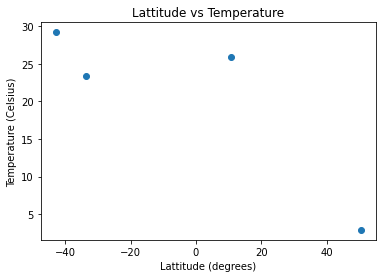

In [9]:
print("clean_city_data") 
print(clean_city_data)
print("************************************************************")
print("Should I convert temp from Celsius to Fahrenheit to make it easier to understand???")
print("using somethink like f_temp=(temp*1.8)+32")
print("If so, do it once up front and replace temp ewith f_temp below") 
print("else have to add conversion for this plus all graphs below")
print("************************************************************")

# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["temp"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Temperature (Celsius)")
plt.title('Lattitude vs Temperature')
# Save the figure
plt.savefig("output_data/lat_temp.png")
# Display the garph
plt.show()

## Latitude vs. Humidity Plot

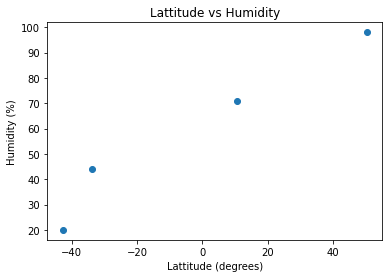

In [10]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Humidity"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Humidity (%)")
plt.title('Lattitude vs Humidity')
# Save the figure
plt.savefig("output_data/lat_hum.png")
# Display the garph
plt.show()

## Latitude vs. Cloudiness Plot

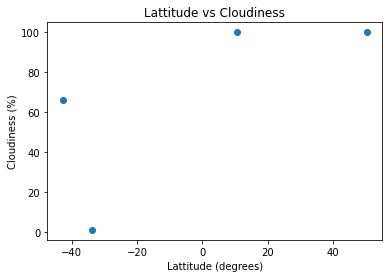

In [11]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Cloudiness"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.title('Lattitude vs Cloudiness')
# Save the figure
plt.savefig("output_data/lat_cloud.png")
# Display the garph
plt.show()

## Latitude vs. Wind Speed Plot

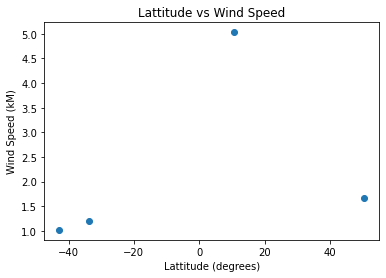

In [12]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Wind Speed"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Wind Speed (kM)")
plt.title('Lattitude vs Wind Speed')
# Save the figure
plt.savefig("output_data/lat_wind.png")
# Display the garph
plt.show()

## Linear Regression

The correlation between both factors is -0.85
line_eq is: y = -0.23x + 19.42


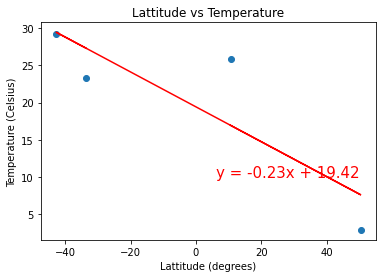

In [14]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = clean_city_data["lat"]
y_values = clean_city_data["temp"]



correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Temperature (Celsius)")
plt.title('Lattitude vs Temperature')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [37]:
# Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and 
# Southern Hemisphere (less than 0 degrees latitude)
# After each pair of plots, take the time to explain what the linear regression is modeling. 
# For example, describe any relationships you notice and any other analysis you may have.

# Set-up and initialize variables 

city_counter = 0
northern_city_counter = 0
southern_city_counter = 0
southern_hemisphere_city = []
southern_hemisphere_lat = []
southern_hemisphere_lon = []
southern_hemisphere_temp = []
southern_hemisphere_humidity = []
southern_hemisphere_clouds = []
southern_hemisphere_wind = []



# Seperate into Northen Hemisphere or Southern Hemisphere
for city in clean_city_data:
    print("city[city_counter:2]")
    print(city[city_counter:2])
    print('clean_city_data["lat"][city_counter]')
    print(clean_city_data["lat"][city_counter])
    if clean_city_data["lat"][city_counter] >= 0:
        print(f'Lattitude for city {city} #{city_counter} is Northen Hemisphere: {clean_city_data["lat"][city_counter]}')
        # Create new DataFrames 
# x_values = 
# y_values = clean_city_data["temp"]
        northen_hemisphere_city.append(clean_city_data["city"][city_counter])
        northen_hemisphere_lat.append(clean_city_data["lat"][city_counter])
        northen_hemisphere_lon.append(clean_city_data["lon"][city_counter])
        northen_hemisphere_temp.append(clean_city_data["temp"][city_counter])
        northen_hemisphere_humidity.append(clean_city_data["Humidity"][city_counter])
        northen_hemisphere_clouds.append(clean_city_data["Cloudiness"][city_counter])
        northen_hemisphere_wind.append(clean_city_data["Wind Speed"][city_counter])
        northern_city_counter += 1
    else:
        print(f'Lattitude for city {city[city_counter]} #{city_counter} is Southern Hemisphere: {clean_city_data["lat"][city_counter]}')
        # Create a new DataFrame 
        southern_hemisphere_city.append(clean_city_data["city"][city_counter])
        southern_hemisphere_lat.append(clean_city_data["lat"][city_counter])
        southern_hemisphere_lon.append(clean_city_data["lon"][city_counter])
        southern_hemisphere_temp.append(clean_city_data["temp"][city_counter])
        southern_hemisphere_humidity.append(clean_city_data["Humidity"][city_counter])
        southern_hemisphere_clouds.append(clean_city_data["Cloudiness"][city_counter])
        southern_hemisphere_wind.append(clean_city_data["Wind Speed"][city_counter])
        southern_city_counter += 1
    city_counter+=1

print("northen_hemisphere_city")
print(northen_hemisphere_city)
print()
print("southern_hemisphere_city")
print(southern_hemisphere_city)

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# x_values = clean_city_data["lat"]
# y_values = clean_city_data["temp"]

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Temperature (Celsius)")
plt.title('Lattitude vs Temperature')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

city[city_counter:2]
ci
clean_city_data["lat"][city_counter]
-33.65
Lattitude for city c #0 is Southern Hemisphere: -33.65
city[city_counter:2]
a
clean_city_data["lat"][city_counter]
-42.7826
Lattitude for city a #1 is Southern Hemisphere: -42.7826
city[city_counter:2]

clean_city_data["lat"][city_counter]
50.3164
Lattitude for city lon #2 is Northen Hemisphere: 50.3164


NameError: name 'northen_hemisphere_city' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression